In [1]:
# This is a first exploration of my techno playlist
# Scrapped on 25/09/19 via webapp
# spafitis

import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



### Data processing and cleaning

In [2]:
df = pd.read_csv('data/thankyoufornotsmoking.csv', sep=",")

In [3]:
# does it work?
# df.head()
df
df.shape

(157, 13)

In [4]:
# first observation is that the date column is inconsistent
# lets ignore days and months and extract only the year
df['year'] = df['release'].str[0:4]

# make sure its numeric
df['year'] = df['year'].apply(pd.to_numeric)
df['year'].dtype

# we no longer need the release column
df = df.drop('release', 1) # 1 represents the columns (0 for index)



In [5]:
# time to convert length to something useful
# lets use seconds
time = pd.DatetimeIndex(df['length'])

# time is now a DatetimeIndex object(?) with information on
# year (all the same / systime), 
# hours (which in reality is minutes),
# minutes (which are seconds)

time[1:7]

# lets fix this to our format of choice
seconds = time.hour*60 + time.minute

# seconds is now no. of seconds for each song
# add it to df
df['seconds'] = seconds


# drop length column
df = df.drop('length', 1)

In [6]:
# save the cleaned file
df.to_csv('data/tfns-cleaned.csv')

df

,id,title,artist,bpm,energy,dance,loud,valence,acoustic,pop,rnd,year,seconds
0,1,Pineapple Crush,Lone,127,80,64,-7,29,0,31,71,2010,326
1,2,Drone Logic,Daniel Avery,114,71,65,-7,10,13,0,6930,2013,429
2,3,The Voyage,Paul Hester,126,53,74,-19,38,26,9,7202,2017,494
3,4,Subsonic Interference,Paul Hester,125,47,79,-15,72,0,2,3350,2017,444
4,5,Toy Ritmo,Dr Funk,123,81,81,-5,37,0,0,9814,2014,457
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,153,Gordon,DJ Tennis,124,73,77,-10,52,1,42,2561,2019,228
153,154,For Your Love - Pépé Bradock's Tendre Piperade,Kemeticjust,126,97,62,-9,53,3,1,4736,2002,526
154,155,Party Guilt - Original MIx,The Royal We,125,44,86,-12,91,0,6,8414,2009,446
155,156,Ai Shi Temasu (Japanese Love) - Original Mix,No Smoke,120,55,87,-14,53,1,7,8506,2018,273


### Time for plots!

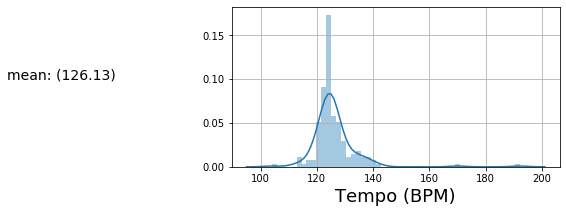

In [7]:
plt.figure(1, figsize=(20, 10),)

plt.subplot(331)
sns.distplot(df.bpm)
plt.text(10, 0.10,
         "mean: (%s)"%df.bpm.mean().round(decimals=2),
         fontsize = 14)
plt.xlabel("Tempo (BPM)", fontsize = 18)
plt.grid(True)



# this will be cumbersome for all variables
# time to automate.

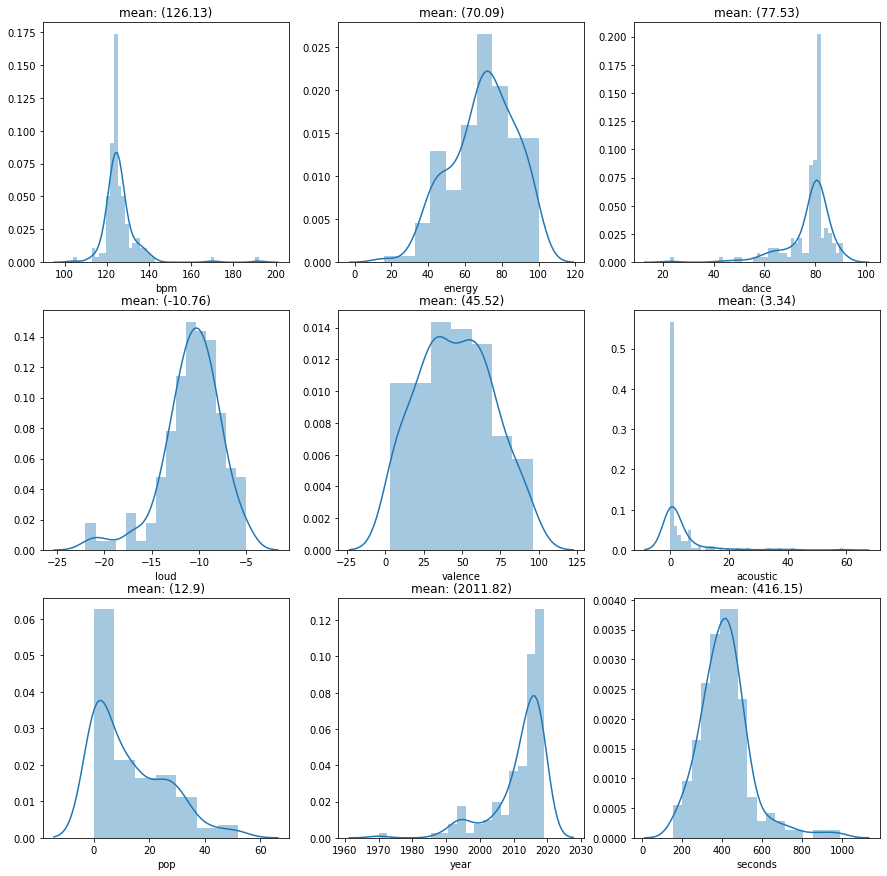

In [8]:
numericdf = df._get_numeric_data()
numericdf = numericdf.drop("id", 1)
numericdf = numericdf.drop("rnd", 1)

fig, axes = plt.subplots(nrows=3, ncols=3, figsize = (15, 15))

for i, column in enumerate(numericdf.columns):
    sns.distplot(numericdf[column],ax=axes[i//3,i%3]).set_title("mean: (%s)"
                                                                %numericdf[column].mean().round(decimals=2))    
    # nice! this worked... annotating them otherwise was a mess since x-axis range is diff for everyplot
    # work-around *smiley face*
    
    
# suggestion by cvaf    
# when you want ncol/nrow to be dynamic
# fig, axs = plt.subplots(5,5, figsize=(25,25))

# all_nvars = num_vars + [target]

# for i, ax_ in enumerate(axs):
#     for j, ax in enumerate(ax_):
#         if j+(5*i) < len(all_nvars):
#             var = all_nvars[j+(5*i)]
#             sns.distplot(df[var].values, ax=ax)
#             ax.set_xlabel(var)
#         else:
#             ax.axis('off')

In [9]:
# maybe this is useful later
numericdf.describe(include = "all").transpose() # .t for ease

,count,mean,std,min,25%,50%,75%,max
bpm,157.0,126.133758,8.274998,104.0,123.0,125.0,127.0,192.0
energy,157.0,70.089172,17.359094,16.0,60.0,71.0,83.0,100.0
dance,157.0,77.528662,9.247010,23.0,77.0,80.0,81.0,91.0
loud,157.0,-10.764331,3.055344,-22.0,-12.0,-10.0,-9.0,-5.0
valence,157.0,45.522293,24.227973,3.0,28.0,45.0,64.0,96.0
acoustic,157.0,3.337580,7.957060,0.0,0.0,0.0,3.0,59.0
pop,157.0,12.904459,13.095205,0.0,1.0,9.0,23.0,52.0
year,157.0,2011.821656,7.940890,1970.0,2010.0,2014.0,2017.0,2019.0
seconds,157.0,416.152866,129.504735,155.0,337.0,410.0,464.0,991.0


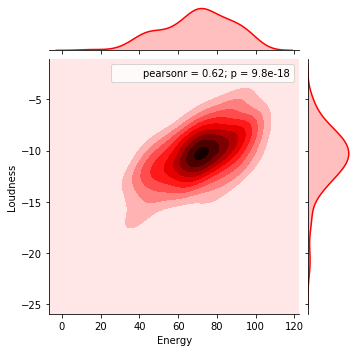

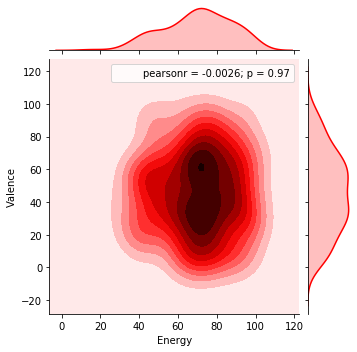

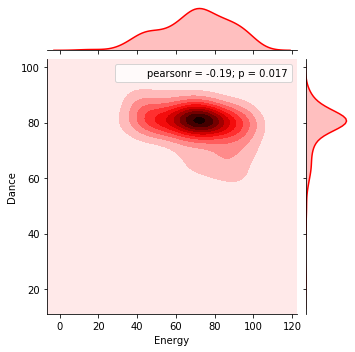

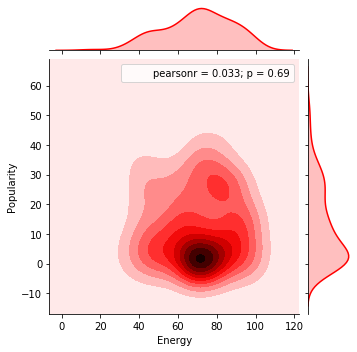

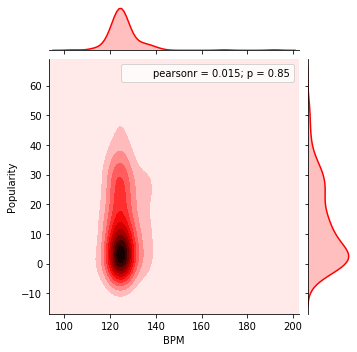

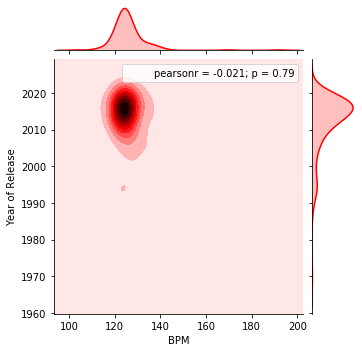

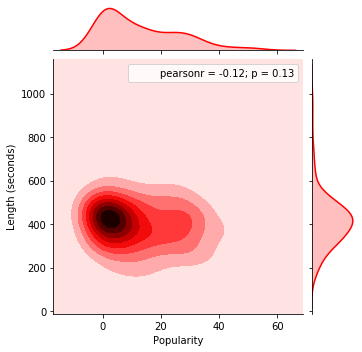

In [11]:
# Lets explore correlations between variables
# it seems theres no good way to get them into a grid
# without hardcoding... labeling should be saved in an 2dim array and 
# accessed for labeling

# with R you can call ~facetwrap; Maybe theres a solution for python as well?
plt.rc("legend", fontsize = 10)

sns.jointplot(x = numericdf["energy"],
              y = numericdf["loud"],
              kind = "kde", color = "r",
              height = 5).set_axis_labels("Energy", 
                                           "Loudness", 
                                           fontsize = 10).annotate(stats.pearsonr)
sns.jointplot(x = numericdf["energy"],
              y = numericdf["valence"],
              kind = "kde", color = "r",
              height = 5).set_axis_labels("Energy", 
                                           "Valence", 
                                           fontsize = 10).annotate(stats.pearsonr)
sns.jointplot(x = numericdf["energy"],
              y = numericdf["dance"],
              kind = "kde", color = "r",
              height = 5).set_axis_labels("Energy", 
                                           "Dance", 
                                           fontsize = 10).annotate(stats.pearsonr)
sns.jointplot(x = numericdf["energy"],
              y = numericdf["pop"],
              kind = "kde", color = "r",
              height = 5).set_axis_labels("Energy", 
                                           "Popularity", 
                                           fontsize = 10).annotate(stats.pearsonr)
sns.jointplot(x = numericdf["bpm"],
              y = numericdf["pop"],
              kind = "kde", color = "r",
              height = 5).set_axis_labels("BPM", 
                                           "Popularity", 
                                           fontsize = 10).annotate(stats.pearsonr)
sns.jointplot(x = numericdf["bpm"],
              y = numericdf["year"],
              kind = "kde", color = "r",
              height = 5).set_axis_labels("BPM", 
                                           "Year of Release", 
                                           fontsize = 10).annotate(stats.pearsonr)
sns.jointplot(x = numericdf["pop"],
              y = numericdf["seconds"],
              kind = "kde", color = "r",
              height = 5).set_axis_labels("Popularity", 
                                           "Length (seconds)", 
                                           fontsize = 10).annotate(stats.pearsonr)

It seems correlation plots with BPM are of no use. The songs in the playlist are all quite similar BPM's hence they mask any potential inferences by those features.

c:\users\pafitis\envs\analysespotify\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\pafitis\envs\analysespotify\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12524 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\pafitis\envs\analysespotify\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12460 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\pafitis\envs\analysespotify\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12479 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\pafitis\envs\analysespotify\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12486 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\pafitis\envs\analysespotify\lib\site-packages\matplotlib

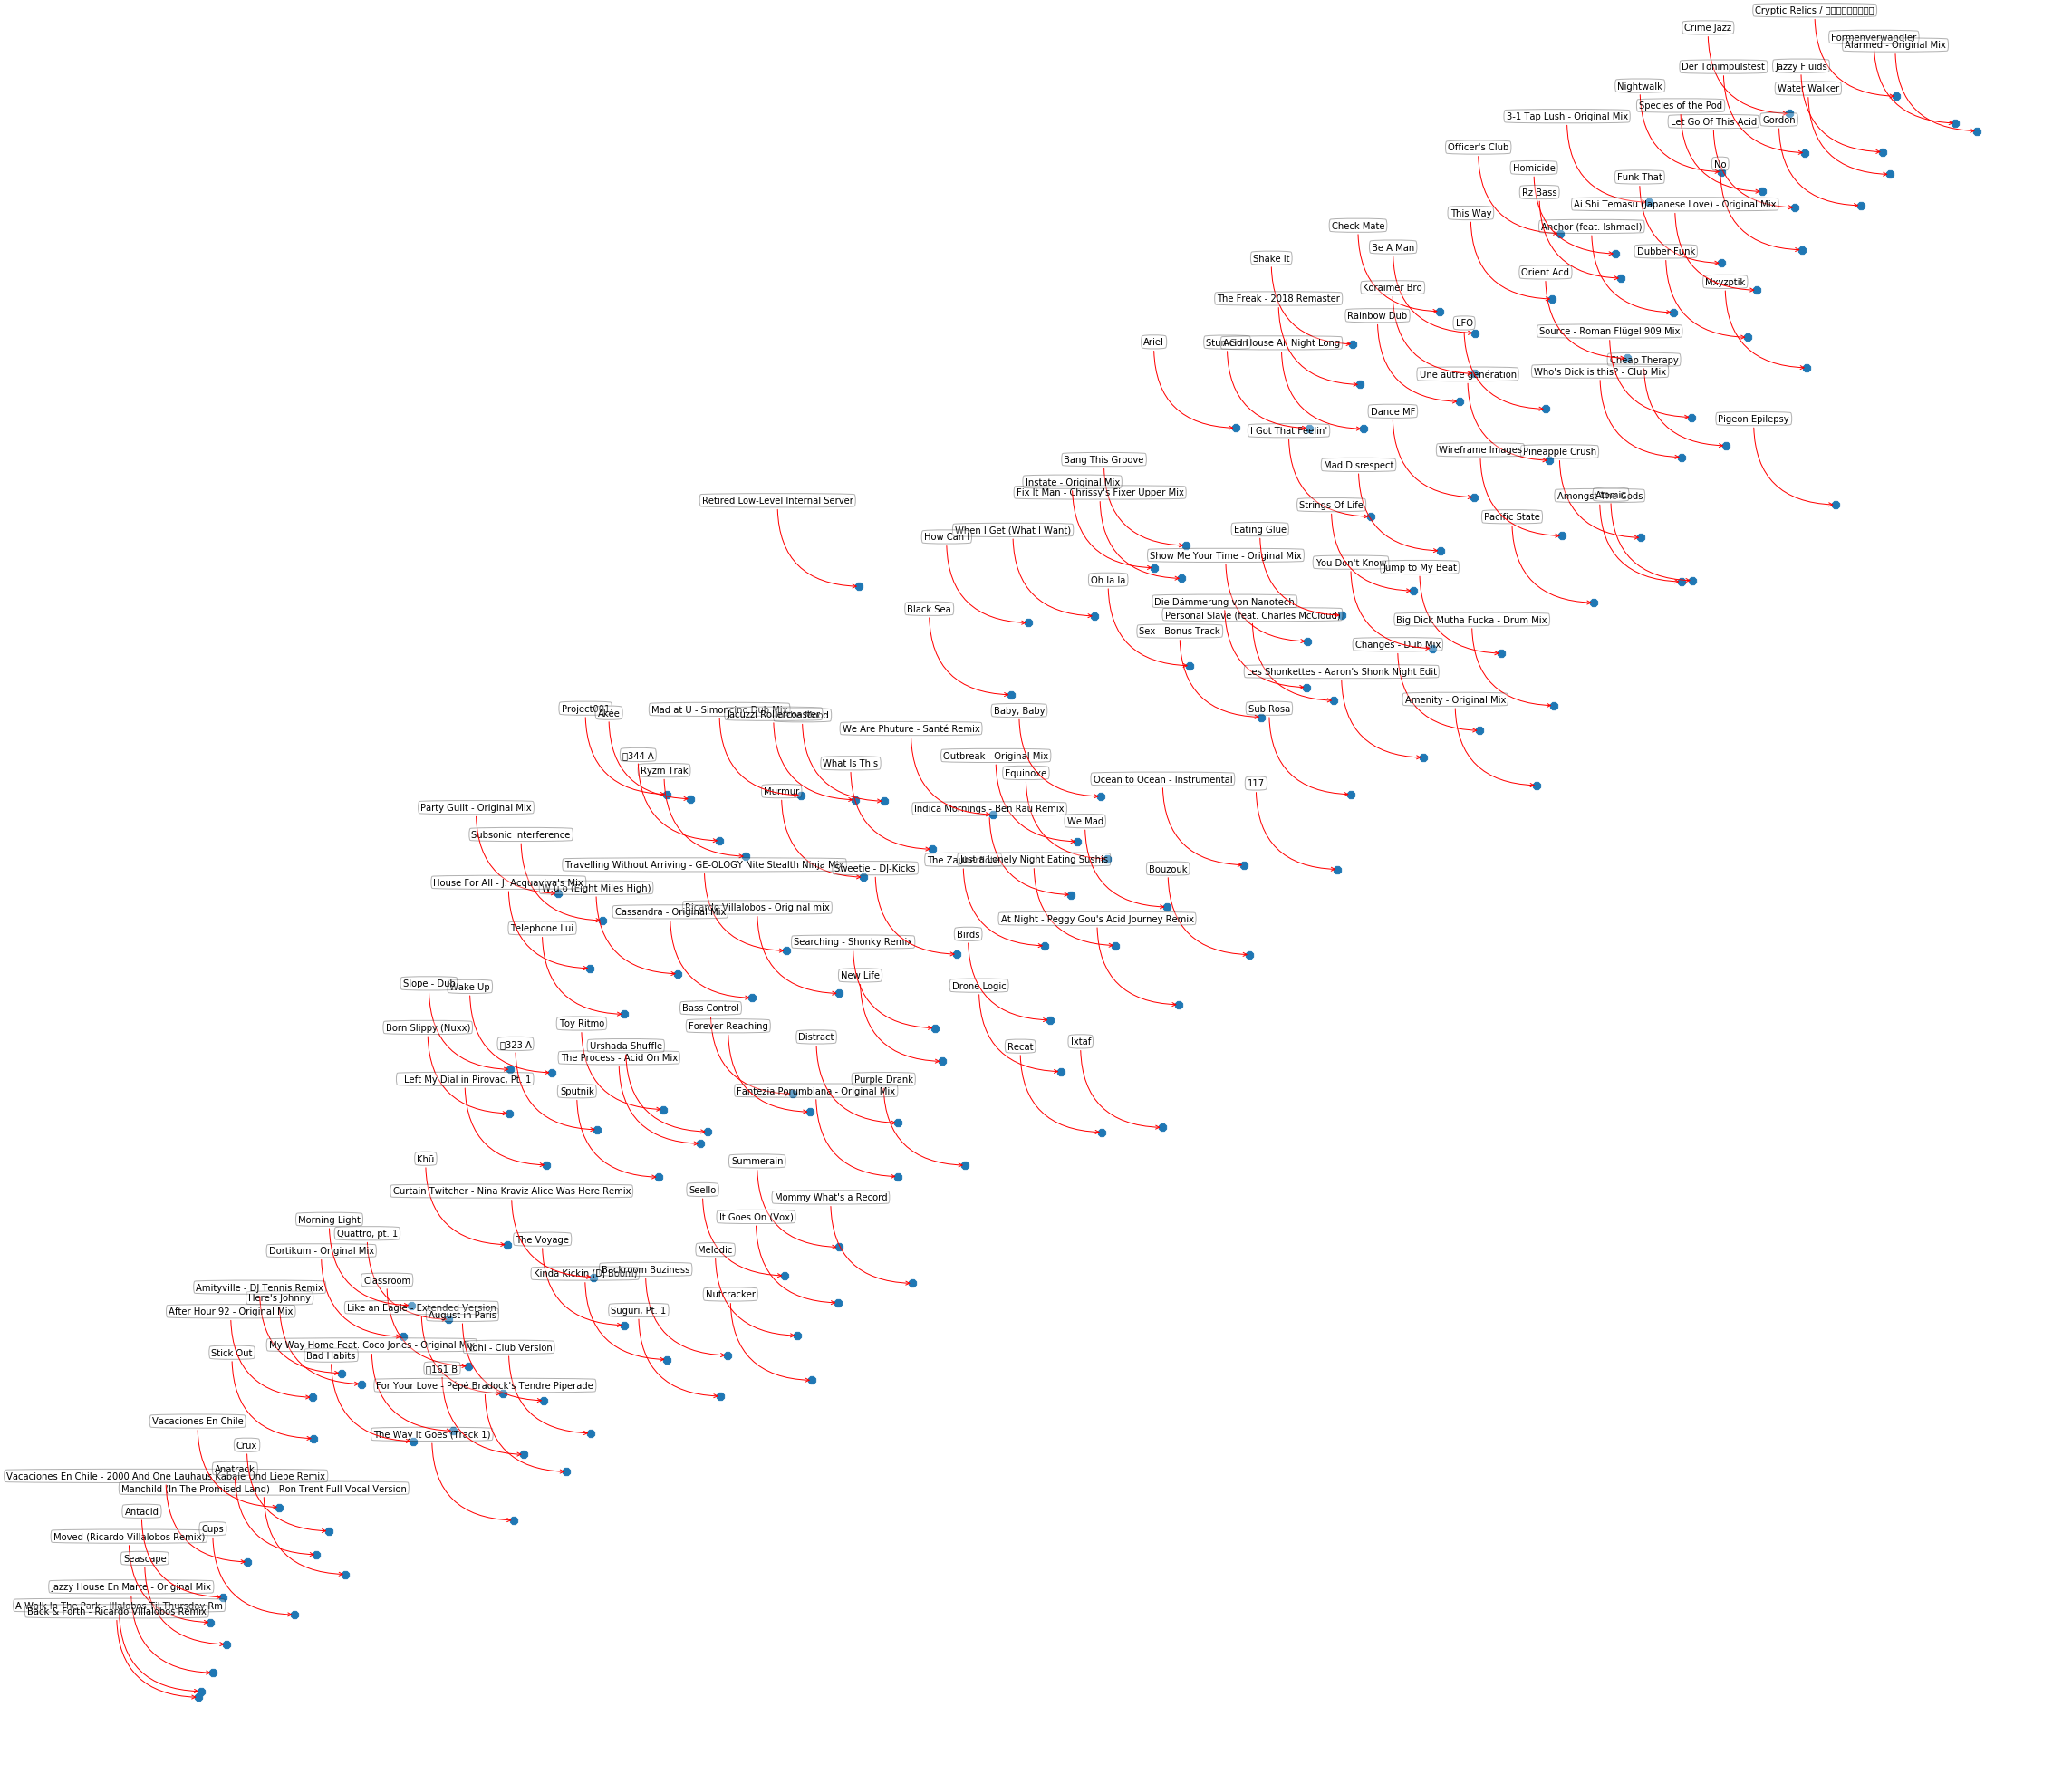

In [31]:
from sklearn.manifold import TSNE
# extract t-distributed stochastic neighbour embedding info
# woop woop sklearn
X_embedded = TSNE(n_components=2).fit_transform(numericdf)


fig = plt.figure(figsize = (30,30))
ax = plt.axes(frameon = False)
plt.setp(ax, xticks = (), yticks = ())
plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 0.9,
                wspace = 0, hspace = 0)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], s = 80, marker = "8")


for row_id in range(0, len(df)):
# if statement below is to label songs by artist of choice
# important if you want to see if somebody's songs are ranked similarly
    if (df.artist[row_id] in ["Drexciya"]):
        target_word = df.title[row_id]
        xx = X_embedded[row_id, 0]
        yy = X_embedded[row_id, 1]
        plt.annotate(target_word, (xx,yy), size = 10, xytext = (-90,90),
                    textcoords = "offset points", ha = "center", va = "bottom",
                    bbox = dict(boxstyle = "round4", fc = "white", alpha = 0.3),
                    arrowprops = dict(arrowstyle = "->", connectionstyle = "arc3, rad = 0.5",
                                     color = "red"))
    

In [32]:
numericdf.corr()

,bpm,energy,dance,loud,valence,acoustic,pop,year,seconds
bpm,1.000000,0.061544,-0.375900,0.081653,-0.010422,0.036986,0.015203,-0.021389,-0.141844
energy,0.061544,1.000000,-0.189824,0.615391,-0.002642,-0.207247,0.032551,-0.045085,-0.181417
dance,-0.375900,-0.189824,1.000000,-0.124689,0.016271,-0.070308,-0.070675,0.036648,0.125340
loud,0.081653,0.615391,-0.124689,1.000000,0.075657,-0.291222,0.097817,0.151814,-0.254651
valence,-0.010422,-0.002642,0.016271,0.075657,1.000000,-0.095819,-0.100783,-0.123892,-0.230217
acoustic,0.036986,-0.207247,-0.070308,-0.291222,-0.095819,1.000000,0.052172,-0.082738,0.130092
pop,0.015203,0.032551,-0.070675,0.097817,-0.100783,0.052172,1.000000,0.106357,-0.121957
year,-0.021389,-0.045085,0.036648,0.151814,-0.123892,-0.082738,0.106357,1.000000,0.080237
seconds,-0.141844,-0.181417,0.125340,-0.254651,-0.230217,0.130092,-0.121957,0.080237,1.000000


In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(numericdf)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [35]:
print(pca.explained_variance_ratio_)
pca.explained_variance_ratio_

[0.9282662  0.03102645]


array([0.9282662 , 0.03102645])